# question2 parta

In [1]:
import numpy as np
import pandas as pd
%pylab inline
df = pd.read_csv('ESLmixture.csv')
X = df[['x.1','x.2']].to_numpy()
y = df[['y']].to_numpy()
Y = []
for i in y:
    if i == [1]: ##assue [1] represents in the first class, 0 is in the second class
        Y.append([1, 0])
    else:
        Y.append([0, 1])
Y = np.array(Y)
print(np.shape(Y))
print(np.shape(X))
new_X = np.ones((1,200))
X_1 = np.insert(X, 0, values = new_X, axis = 1)
def get_B(X, Y):
    X_T = np.transpose(X)
    XTX = np.matmul(X_T, X)
    B_hat = np.matmul(np.linalg.inv(XTX),np.matmul(X_T,Y))
    return B_hat
def classi(new_x, X_1, Y):##1 by 2
    B_hat=get_B(X_1, Y)
    x = np.array([1,new_x[0],new_x[1]])
    predict_y = np.matmul(np.transpose(x),B_hat)
    if predict_y[0]>=predict_y[1]:
        return 1
    else:
        return 0

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(200, 2)
(200, 2)


Text(0.5, 1.0, 'linear regression for binary classification')

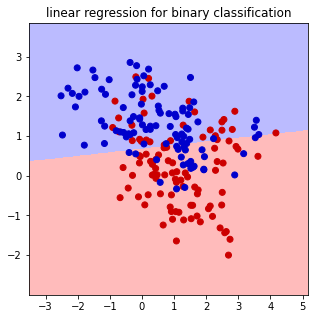

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
h = 0.01
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = []
for i in grid:
    Z.append(classi(i, X_1, Y))
    # Put the result into a color plot
Z=np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5,5))
if False:
    plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
else:
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
   # Plot also the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("linear regression for binary classification")

Text(0.5, 1.0, 'linear regression for binary classification')

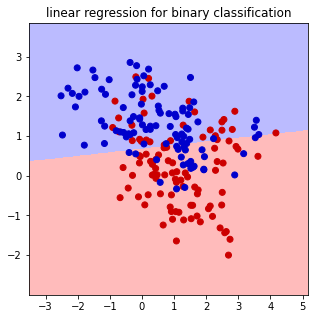

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
h = 0.01
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = []
#print(reg.predict(grid))
for i in grid:
    m = reg.predict([i])
    Z.append(reg.predict([i]))
    # Put the result into a color plot
Z=np.array(Z).ravel()
pred_Z = []
for i in Z:
    if i<=0.5:
        pred_Z.append(0)
    else:
        pred_Z.append(1)
pred_Z=np.array(pred_Z)
pred_Z = pred_Z.reshape(xx.shape)
plt.figure(figsize=(5,5))
if False:
    plt.scatter(xx, yy, c=pred_Z, cmap=cmap_light, edgecolor='none')
else:
    plt.pcolormesh(xx, yy, pred_Z, cmap=cmap_light, shading='auto')
   # Plot also the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("linear regression for binary classification")

# question3

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
df = pd.read_csv("bank.txt",sep=";")
print(df.dtypes)
df.head()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df['job'].unique()
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['job','marital','education','default','housing','loan',\
                                     'contact','month','poutcome']]).toarray()
others = df[['age','balance','day','duration','campaign','pdays','previous']].to_numpy()
X = np.insert(feature_array, [0,1,2,3,4,5,6], others, axis = 1)
y = df['y'].map({'no':0, 'yes':1})

3390


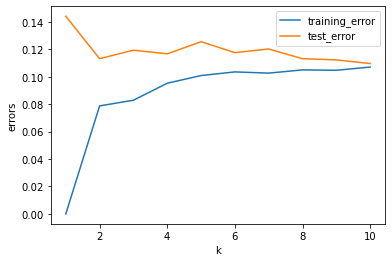

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(np.shape(X_train)[0])
traing_error = []
test_error = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    y_hat_train = neigh.predict(X_train)
    trainr = np.dot((y_hat_train-y_train),(y_hat_train-y_train))/np.shape(X_train)[0]
    traing_error.append(trainr)
    
    y_hat_test = neigh.predict(X_test)
    testr = np.dot(y_hat_test-y_test,y_hat_test-y_test)/np.shape(X_test)[0]
    test_error.append(testr)

xpoints = np.linspace(1,10,10)
plt.plot(xpoints, traing_error,label = 'training_error')
plt.plot(xpoints, test_error,label = 'test_error')
plt.xlabel('k')
plt.ylabel('errors')
plt.legend()
plt.show()

# question4

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train = pd.read_csv("train")
test = pd.read_csv("test")
train_X = train[['x.1','x.2','x.3','x.4','x.5','x.6','x.7','x.8','x.9','x.10']].to_numpy()
train_y = train[['y']].to_numpy().ravel()
clf = LinearDiscriminantAnalysis()
clf.fit(train_X, train_y)
test_x = test[['x.1','x.2','x.3','x.4','x.5','x.6','x.7','x.8','x.9','x.10']].to_numpy()
test_y = test[['y']].to_numpy().ravel()
y_hat_test = clf.predict(test_x)
N = np.shape(test_y)
error=(np.sum(np.dot(test_y-y_hat_test,test_y-y_hat_test)))/N
print("Error for LDA is ",error)

Error for LDA is  [5.48268398]


In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(train_X, train_y)
y_hat_test2 = clf2.predict(test_x)
error2=(np.sum(np.dot(test_y-y_hat_test2,test_y-y_hat_test2)))/N
print("Error for QDA is ",error2)

Error for QDA is  [3.41774892]


In [21]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(solver='lbfgs', max_iter=100,multi_class='auto').fit(train_X, train_y)
clf3.fit(train_X, train_y)
y_hat_test3 = clf3.predict(test_x)
error3=(np.sum(np.dot(test_y-y_hat_test3,test_y-y_hat_test3)))/N
print("Error for LOGISTIC lbfgs is ",error3)

clf3 = LogisticRegression(solver='sag', max_iter=100,multi_class='auto').fit(train_X, train_y)
clf3.fit(train_X, train_y)
y_hat_test3 = clf3.predict(test_x)
error3=(np.sum(np.dot(test_y-y_hat_test3,test_y-y_hat_test3)))/N
print("Error for LOGISTIC sag is ",error3)

clf3 = LogisticRegression(solver='liblinear', max_iter=100,multi_class='auto').fit(train_X, train_y)
clf3.fit(train_X, train_y)
y_hat_test3 = clf3.predict(test_x)
error3=(np.sum(np.dot(test_y-y_hat_test3,test_y-y_hat_test3)))/N
print("Error for LOGISTIC liblinear is ",error3)

clf3 = LogisticRegression(solver='saga', max_iter=100,multi_class='auto').fit(train_X, train_y)
clf3.fit(train_X, train_y)
y_hat_test3 = clf3.predict(test_x)
error3=(np.sum(np.dot(test_y-y_hat_test3,test_y-y_hat_test3)))/N
print("Error for LOGISTIC saga is ",error3)
print("'lbfgs' gives the smallest error")

Error for LOGISTIC lbfgs is  [5.59090909]
Error for LOGISTIC sag is  [5.79220779]
Error for LOGISTIC liblinear is  [7.51298701]
Error for LOGISTIC saga is  [6.31385281]
'lbfgs' gives the smallest error


/Users/shoufumisakai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shoufumisakai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_